# Create a Custom Suite

A suite is a list of checks that will be run one after the other, and its results displayed together.

We can either use one of the predefined suites (see the quickstart to deepchecks tutorial), or create our own custom suites, by choosing the checks (and optional conditions) we want the suilt to contain.

## Define a New Suite

In [1]:
# importing all existing checks for demonstration simplicity
from deepchecks.checks import *
from deepchecks import Suite
import deepchecks as dc

Let's say we want to create our custom suite, mainly with various performance checks.  
Let's start by checking which builtin performance checks exist (can be found also using the API reference):

In [2]:
print([class_name for class_name in dir(dc.checks.performance) if class_name[0].isupper()])

['CalibrationMetric', 'ClassPerformanceImbalance', 'ConfusionMatrixReport', 'PerformanceReport', 'RocReport', 'SegmentPerformance', 'SimpleModelComparison']


In [3]:
MyModelSuite = Suite('Simple Suite For Model Performance',
    ModelInfo(),
    PerformanceReport(),
    TrainTestDifferenceOverfit().add_condition_degradation_ratio_not_greater_than(threshold=0.15),
    ConfusionMatrixReport(),
    SimpleModelComparison(simple_model_type='constant').add_condition_ratio_not_less_than(0.9)
)

### Note about adding conditions to the checks in a suite

Most check classes have methods with the naming convention `add_condition_x`, which enables adding a condition logic to parse the check's results. The pass/fail/insight status of the condition will be displayed in the suite's conditions summary. Note that the checks in the built-in suites come with default conditions, and when building your custom suite you should choose which conditions to add.

Many conditions have configurable arguments that can be passed to the condition while adding it.  
Each check instance can have several conditions or none. Each condition will be evaluated separately.

## Run the Suite

This is simply done by calling the `run` method of the suite.

To see that in action, we'll need datasets and a model.  
Let's quickly load a dataset and train a simple model for the sake of this demo

### Load Data, Split Train-Val, and Train a Simple Model

In [4]:
import pandas as pd
import numpy as np
np.random.seed(42)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [5]:
# load data
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

In [6]:
# train model
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

In [7]:
from deepchecks import Dataset

In [8]:
ds_train = Dataset(df_train, label=label_col, cat_features=[], use_index=False, date=None)
ds_test =  Dataset(df_test,  label=label_col, cat_features=[])

### Run Suite

Simple Suite For Model Performance:   0%|          | 0/5 [00:00<?, ? Check/s]

Simple Suite For Model Performance 
 The suite is composed of various checks such as: Model Info, Performance Report, Train Test Difference Overfit, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ), as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status,Check,Condition,More Info
✓,Train-Test Difference Overfit,Train-Test metrics degradation ratio is not greater than 0.15,
✓,Simple Model Comparison,Ratio not less than 0.9 between the given model's result and the simple model's result,


Additional Outputs

Model Info

Summarize given model parameters.

Model Type: RandomForestClassifier

Parameter,Value,Default
bootstrap,True,True
ccp_alpha,0.00,0.00
class_weight,None,None
criterion,gini,gini
max_depth,None,None
max_features,auto,auto
max_leaf_nodes,None,None
max_samples,None,None
min_impurity_decrease,0.00,0.00
min_samples_leaf,1,1


Colored rows are parameters with non-default values

Performance Report - Test Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,1.00
Precision - Macro Average,1.00
Recall - Macro Average,1.00


Train-Test Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on test data.

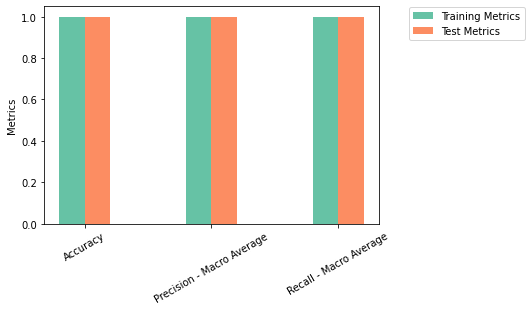

Confusion Matrix Report - Test Dataset

Calculate the confusion matrix of the model on the given dataset.

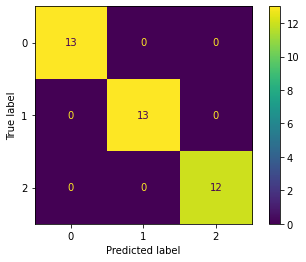

Simple Model Comparison

Compare given model score to simple model score (according to given model type).

The given model performs 2.92 times compared to the simple model using the Accuracy metric. RandomForestClassifier model prediction has achieved a score of 1 compared to Simple constant prediction which achieved a score of 0.34 on tested data.

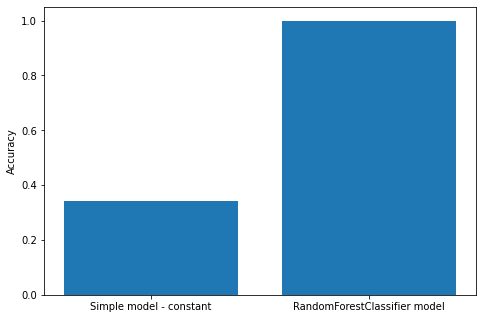

In [9]:
MyModelSuite.run(model=rf_clf, train_dataset=ds_train, test_dataset=ds_test, check_datasets_policy='test')